# Survey responses Data Analysis

In [33]:
from platform import python_version

print(python_version()) # 3.9.12

3.9.13


In [34]:
!pip install krippendorff

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import krippendorff
import scipy
from scipy import stats

In [36]:
survey = pd.read_csv('data/surveys_responses.csv')
survey

,TEXT1,TEXT2,SIMILARITY_SCORE,SIMILARITY_CONFIDENCE,TEXT1_HIGHLIGHT,TEXT1_HIGHLIGHT_POSITION,TEXT2_HIGHLIGHT,TEXT2_HIGHLIGHT_POSITION
0,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,"A observância do cadastro de adotantes, não é ...",Corpo,ausência de impugnação dos fundamentos do acó...,Corpo
1,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,Não relacionado,Corpo,Não relacionado,Corpo
2,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,1,4,Inviável a análise de matéria federal não pre...,Corpo,"deve-se reconhecer a violação ao art. 51, I, d...",Corpo
3,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,2,4,O acórdão recorrido está expressamente embasad...,Corpo,Anulada a cláusula que limita o valor da inden...,Corpo
4,AGRAVO REGIMENTAL NO HABEAS CORPUS. DIREIT...,PROCESSUAL PENAL. CRIME DE TRÂNSITO. DIREÇÃ...,2,4,os crimes de embriaguez ao volante,Corpo,dirigir veículo automotor em via\npública com...,Corpo
...,...,...,...,...,...,...,...,...
235,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,0,4,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,Cabeçalho,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,Cabeçalho
236,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,0,sem similaridade,Corpo,sem similaridade,Corpo
237,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,4,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,Cabeçalho,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,Cabeçalho
238,MANDADO DE SEGURANÇA. ADMINISTRATIVO. POLICIAL...,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERV...,3,1,mandado de segurança,Corpo,mandado de segurança,Corpo


### Pares com mais de um rótulo

In [37]:
survey_one_label = survey[survey[['TEXT1','TEXT2','SIMILARITY_SCORE']].groupby(['TEXT1','TEXT2'])['SIMILARITY_SCORE'].transform('count') == 1]
survey_one_label.to_csv('data/one_label.csv')
len(survey_one_label)

40

In [38]:
survey_two_label = survey[survey[['TEXT1','TEXT2','SIMILARITY_SCORE']].groupby(['TEXT1','TEXT2'])['SIMILARITY_SCORE'].transform('count') > 1]
survey_two_label

,TEXT1,TEXT2,SIMILARITY_SCORE,SIMILARITY_CONFIDENCE,TEXT1_HIGHLIGHT,TEXT1_HIGHLIGHT_POSITION,TEXT2_HIGHLIGHT,TEXT2_HIGHLIGHT_POSITION
0,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,"A observância do cadastro de adotantes, não é ...",Corpo,ausência de impugnação dos fundamentos do acó...,Corpo
1,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,Não relacionado,Corpo,Não relacionado,Corpo
2,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,1,4,Inviável a análise de matéria federal não pre...,Corpo,"deve-se reconhecer a violação ao art. 51, I, d...",Corpo
3,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,2,4,O acórdão recorrido está expressamente embasad...,Corpo,Anulada a cláusula que limita o valor da inden...,Corpo
4,AGRAVO REGIMENTAL NO HABEAS CORPUS. DIREIT...,PROCESSUAL PENAL. CRIME DE TRÂNSITO. DIREÇÃ...,2,4,os crimes de embriaguez ao volante,Corpo,dirigir veículo automotor em via\npública com...,Corpo
...,...,...,...,...,...,...,...,...
235,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,0,4,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,Cabeçalho,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,Cabeçalho
236,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,0,sem similaridade,Corpo,sem similaridade,Corpo
237,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,4,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,Cabeçalho,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,Cabeçalho
238,MANDADO DE SEGURANÇA. ADMINISTRATIVO. POLICIAL...,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERV...,3,1,mandado de segurança,Corpo,mandado de segurança,Corpo


#### Então dos 140 pares que deveriam ser anotados por 2 anotadores, 40 pares foram anotados por apenas 1.

In [39]:
heuristic = pd.read_csv('data/to_anotate.csv')
heuristic

,sentence_A,sentence_B,score
0,PROCESSUAL CIVIL E ADMINISTRATIVO. SERVIDÃO AD...,PROCESSUAL CIVIL E ADMINISTRATIVO - DESAPROPRI...,2
1,AGRAVO INTERNO NO AGRAVO EM RECURSO ESPE...,AGRAVO INTERNO NO AGRAVO EM RECURSO ESPECIAL....,4
2,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. PORTE DE ARMA DE FOGO E MUN...,0
3,PROCESSUAL CIVIL. AÇÃO CIVIL PÚBLICA. AMBIENTA...,DIREITO CIVIL. FAMÍLIA. ADOÇÃO DE MENORES POR ...,0
4,AGRAVO REGIMENTAL. RECURSO ORDINÁRIO. MANDADO ...,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,4
...,...,...,...
136,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,2
137,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO AGRAVO ...,4
138,PROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO REGI...,PROCESSUAL CIVIL - ADMINISTRATIVO - RECURSO ES...,4
139,AGRAVO REGIMENTAL NO RECURSO EM MANDADO DE SEG...,ADMINISTRATIVO E PROCESSUAL CIVIL. MANDADO...,2


## Questões de Pesquisa

1. Quão relacionadas estão os rótulos dos especialistas para um mesmo par de documentos?
2. Onde estão concentrados os trechos principais dos documentos, corpo ou cabeçalho?
3. Qual a distribuição dos rótulos no conjunto de dados anotado pelos especialistas?
4. Qual a distribuição dos rótulos no conjunto de dados anotado heuristicamente?
5. Quão relacionados estão os rótulos dos especialistas e da heurística?
6. Qual a média e desvio padrão da confiança dos especialistas aos rótulos atribuídos?

In [40]:
# https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
survey_tmp = survey_two_label[['TEXT1','TEXT2', 'SIMILARITY_SCORE']].astype('object').groupby(['TEXT1','TEXT2'])['SIMILARITY_SCORE']\
                                                    .agg(pd.Series.mode).to_frame().reset_index()
survey_tmp

,TEXT1,TEXT2,SIMILARITY_SCORE
0,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,AGRAVO REGIMENTAL. PROCESSUAL CIVIL. NÃO HÁ QU...,"[0, 3]"
1,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,CHEQUE. CAUÇÃO. CAUSA DEBENDI. POSSIBILIDADE\n...,"[0, 2]"
2,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,EMBARGOS DE DECLARAÇÃO. PROCESSO CIVIL. APLICA...,"[0, 3]"
3,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,"[1, 2]"
4,ADMINISTRATIVO E PROCESSUAL CIVIL. SUPOSTA...,AGRAVO INTERNO EM AGRAVO (ART. 544 DO...,"[0, 3]"
...,...,...,...
95,RECURSO ESPECIAL - PROPRIEDADE INDUSTRIAL - DI...,PENAL E PROCESSUAL. RECURSO ORDINÁRIO EM HABEA...,0
96,RECURSO ESPECIAL - PROPRIEDADE INDUSTRIAL - DI...,PENAL. PROCESSUAL PENAL. HABEAS CORPUS SUBSTIT...,0
97,RECURSO ESPECIAL. AÇÃO DE COBRANÇA. AVALISTA D...,Direito comercial e processual civil. Agravo n...,"[1, 3]"
98,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,"[0, 3]"


In [41]:
survey_discrepancy = survey_tmp.iloc[[x.Index for x in survey_tmp.itertuples() if type(x.SIMILARITY_SCORE)== np.ndarray]]
survey_discrepancy.to_csv('data/discrepancy.csv')
survey_discrepancy

,TEXT1,TEXT2,SIMILARITY_SCORE
0,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,AGRAVO REGIMENTAL. PROCESSUAL CIVIL. NÃO HÁ QU...,"[0, 3]"
1,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,CHEQUE. CAUÇÃO. CAUSA DEBENDI. POSSIBILIDADE\n...,"[0, 2]"
2,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,EMBARGOS DE DECLARAÇÃO. PROCESSO CIVIL. APLICA...,"[0, 3]"
3,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,"[1, 2]"
4,ADMINISTRATIVO E PROCESSUAL CIVIL. SUPOSTA...,AGRAVO INTERNO EM AGRAVO (ART. 544 DO...,"[0, 3]"
...,...,...,...
91,PROCESSUAL CIVIL. EMBARGOS DE DECLARAÇÃO NO RE...,AGRAVO REGIMENTAL. PROCESSUAL CIVIL. EXECUÇÃO ...,"[0, 2]"
92,RECURSO EM HABEAS CORPUS. TRÁFICO DE DROGAS E ...,HABEAS CORPUS. ARTS. 33 E 35 DA LEI Nº 11.343/...,"[2, 3]"
97,RECURSO ESPECIAL. AÇÃO DE COBRANÇA. AVALISTA D...,Direito comercial e processual civil. Agravo n...,"[1, 3]"
98,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,"[0, 3]"


In [42]:
survey_agreement = survey.iloc[[x.Index for x in survey_tmp.itertuples() if type(x.SIMILARITY_SCORE) == int]]
survey_agreement

,TEXT1,TEXT2,SIMILARITY_SCORE,SIMILARITY_CONFIDENCE,TEXT1_HIGHLIGHT,TEXT1_HIGHLIGHT_POSITION,TEXT2_HIGHLIGHT,TEXT2_HIGHLIGHT_POSITION
8,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,1,4,"entendimento pacificado neste Corte,",Corpo,A jurisprudência já assentou entendimento,Corpo
9,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,4,"Conforme entendimento pacificado neste Corte,...",Corpo,A jurisprudência já assentou entendimento no s...,Corpo
11,AGRAVO REGIMENTAL NOS EMBARGOS DE DECLARAÇÃO N...,RECURSO ESPECIAL. CIVIL. INCORPORAÇÃO IMOBILIÁ...,3,4,A abusividade da pactuação deve ser cabalmente...,Corpo,"Todavia, a autorização de alienação do imóvel ...",Corpo
13,DIREITO CIVIL E DO CONSUMIDOR. AGRAVO NO RECUR...,PENAL. HABEAS CORPUS SUBSTITUTIVO DE R...,0,4,Não relacionado,Corpo,Não relacionado,Corpo
17,CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,2,4,A taxa média de mercado apurada pelo Banco Cen...,Corpo,as instituições financeiras não se sujeitam à ...,Corpo
18,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,1,4,lesão causada ao meio ambiente\npermite a cu...,Corpo,A cobrança indevida de serviço de telefon...,Corpo
19,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,2,4,A responsabilidade pelos atos que desresp...,Corpo,cobrança indevida de serviço de telefoni...,Corpo
25,EXECUÇÃO PENAL. HABEAS CORPUS SUBSTITUTIVO DE ...,HABEAS CORPUS SUBSTITUTIVO DE RECURSO ORDINÁRI...,3,4,HABEAS CORPUS NÃO CONHECIDO.,Cabeçalho,HABEAS CORPUS CONCEDIDA DE OFÍCIO,Cabeçalho
43,ADMINISTRATIVO. MANDADO DE SEGURANÇA. PROCESSO...,PROCESSUAL CIVIL. ADMINISTRATIVO. DANOS AMBIEN...,0,4,1. A prova produzida em ação penal pode ser us...,Corpo,"0. Deveras, o Tribunal a quo à luz de ampla c...",Corpo
47,AGRAVO REGIMENTAL. AGRAVO EM RECURSO ESPECIAL....,PROCESSUAL CIVIL. LOCAÇÃO. AÇÃO DE DESPEJO. AP...,4,4,2. O recurso de apelação que ataca sentença pr...,Corpo,I - O Superior Tribunal de Justiça já pacifico...,Corpo


### 1. Quão relacionadas estão os rótulos dos especialistas para um mesmo par de documentos?

- Dos 100 pares de documentos anotados por 2 anotadores, 32 pares foram anotados em concordância entre os 2 anotadores. Logo 68 pares de documentos foram rotulados de maneiras distintas pelos 2 anotadores.

In [43]:
print("Pares anotados em concordância: ", len(survey_agreement))

Pares anotados em concordância:  32


#### Com relação aos dados anotados em divergência

In [44]:
tmp = np.array([t.tolist() for t in survey_discrepancy.SIMILARITY_SCORE.values])
distances_in_discrepancy = [abs(t[0]-t[1]) for t in tmp]
mean = np.mean(distances_in_discrepancy)
mean_variance = np.var(distances_in_discrepancy)
mean_std = np.std(distances_in_discrepancy)
print('Média da distância da divergência: ', mean, 
      '\nVariância da distância da divergência: ', mean_variance, 
      '\nDesvio padrão da distância da divergência: ', mean_std)

Média da distância da divergência:  1.6323529411764706 
Variância da distância da divergência:  0.5854238754325259 
Desvio padrão da distância da divergência:  0.7651299729016803


In [45]:
stats.pearsonr(tmp[:,0], tmp[:,1]) #(Pearson’s correlation coefficient, 2-tailed p-value)

PearsonRResult(statistic=0.6275219717755693, pvalue=1.0239019504403163e-08)

In [46]:
stats.spearmanr(tmp[:,0], tmp[:,1]) #(Pearson’s correlation coefficient, 2-tailed p-value)

SpearmanrResult(correlation=0.6045049720354123, pvalue=4.792430706079734e-08)

In [47]:
print("Krippendorff's alpha for interval metric: ", krippendorff.alpha(reliability_data=[tmp[:,0].tolist(),tmp[:,1].tolist()]))

Krippendorff's alpha for interval metric:  -0.12132145675949935


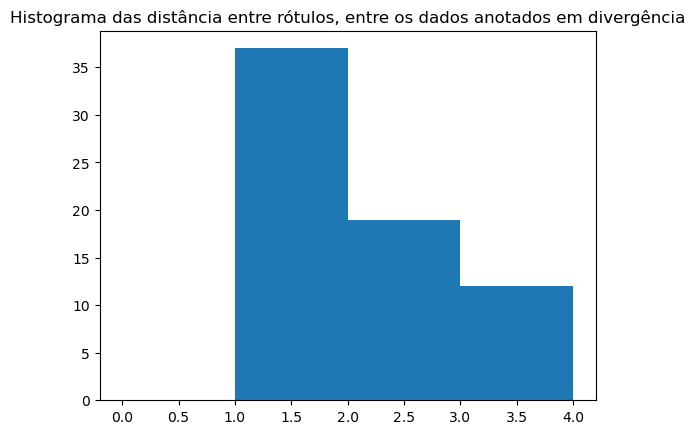

In [48]:
plt.hist(distances_in_discrepancy, bins = [0, 1, 2, 3, 4])

plt.title("Histograma das distância entre rótulos, entre os dados anotados em divergência")
plt.show()

#### Análise da distância entre divergências dos especialistas em extratos de interesse
Uma inconsistência de anotação entre especialistas onde um atribui uma alta similaridade e outro uma similaridade baixa ou neutra (o mesmo vale para não similaridade) pode ser vista como uma divergência parcial. Já no caso onde um especialista acha que o par de documentos é similar e o outro acha que não são similares pode ser visto como uma divergência total. 
Nessa pesquisa, os casos onde a discrepância de rótulos é tal que os rótulos de um par de documento estejam entre (0,1 e 2) ou entre (2,3 e 4) são casos de divergência parcial. Agora casos onde um especialista atribui um rótulo (0,1) e outro (3,4) é uma divergência total. 

In [49]:
d_non_similar = []
d_similar = []
d_incons = []
for d in [t.tolist() for t in survey_discrepancy.SIMILARITY_SCORE.values]:
    if d[0] in [0,1,2] and d[1] in [0,1,2]:
        d_non_similar.append(d)
    elif (d[0] in [2,3,4] and d[1] in [2,3,4]):
        d_similar.append(d)
    elif (d[0] in [0,1] and d[1] in [3,4]) or (d[1] in [0,1] and d[0] in [3,4]):
        d_incons.append(d)

print('Total de divergências parciais sobre não similaridade: ', len(d_non_similar), "- Distância média: ",np.mean([abs(t[0]-t[1]) for t in d_non_similar]))
print('Total de divergências parciais sobre similaridade: ', len(d_similar), "- Distância média: ",np.mean([abs(t[0]-t[1]) for t in d_similar]))
print('Total de divergências totais: ', len(d_incons), "- Distância média: ",np.mean([abs(t[0]-t[1]) for t in d_incons]))


Total de divergências parciais sobre não similaridade:  28 - Distância média:  1.1071428571428572
Total de divergências parciais sobre similaridade:  18 - Distância média:  1.3333333333333333
Total de divergências totais:  22 - Distância média:  2.5454545454545454


### 2. Onde estão concentrados os trechos principais dos documentos, corpo ou cabeçalho?

Agrupando os destaques do primeiro e do segundo documento do par.

<AxesSubplot:ylabel='None'>

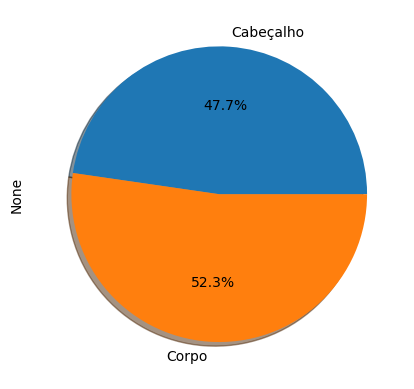

In [50]:
pd.concat([survey.TEXT1_HIGHLIGHT_POSITION, survey.TEXT2_HIGHLIGHT_POSITION]).value_counts().sort_values()\
    .plot.pie(legend=False,autopct='%1.1f%%', shadow=True, startangle=0)

A posição dos destaques em cada documento do par é a mesma?

In [51]:
(survey['TEXT1_HIGHLIGHT_POSITION'] == survey['TEXT2_HIGHLIGHT_POSITION']).value_counts()

True     199
False     41
dtype: int64

### 3. Qual a distribuição dos rótulos no conjunto de dados anotado pelos especialistas?

Levando em consideração apenas os dados anotados em concordância

Distribuição dos rótulos entre os pares anotados em concordância


<AxesSubplot:xlabel='Rótulos', ylabel='Quantidade'>

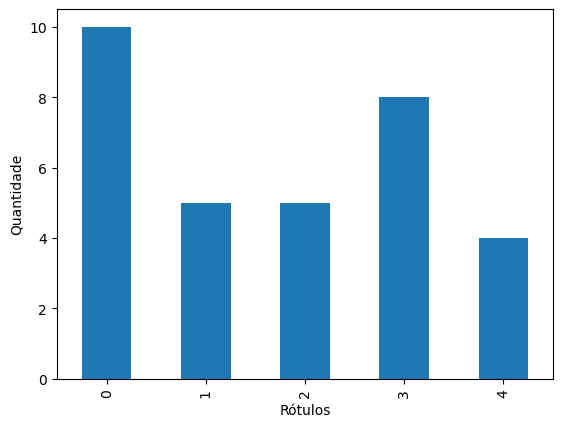

In [52]:
print("Distribuição dos rótulos entre os pares anotados em concordância")
survey_agreement['SIMILARITY_SCORE'].value_counts().sort_index().plot(kind = 'bar', xlabel='Rótulos', ylabel='Quantidade')

Juntando as similaridades dos extremos para facilitar a comparação com os dados da heurística

<AxesSubplot:xlabel='Rótulos', ylabel='Quantidade'>

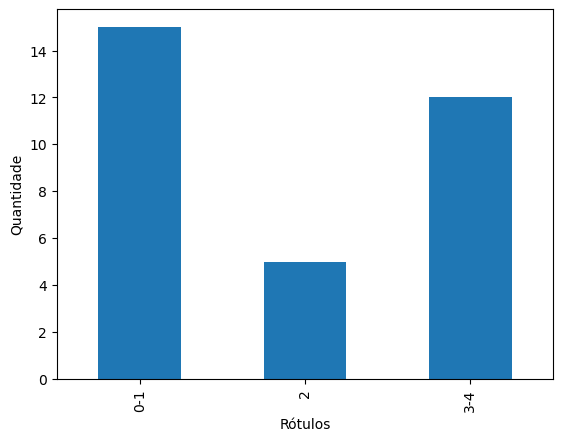

In [53]:
tmp_value_cnt = survey_agreement['SIMILARITY_SCORE'].value_counts()
dict = {'0-1': tmp_value_cnt[0]+tmp_value_cnt[1],
        '2': tmp_value_cnt[2],
        '3-4': tmp_value_cnt[3]+tmp_value_cnt[4]}
pd.Series(dict).plot(kind = 'bar', xlabel='Rótulos', ylabel='Quantidade')

<AxesSubplot:ylabel='SIMILARITY_SCORE'>

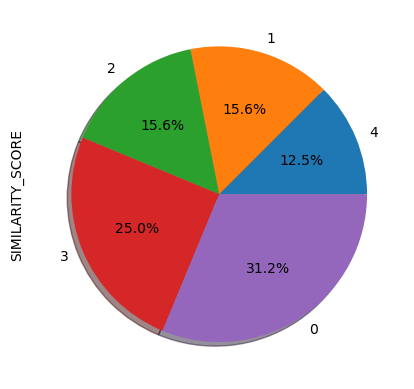

In [54]:
survey_agreement['SIMILARITY_SCORE'].value_counts().sort_values().plot.pie(legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

### 4. Qual a distribuição dos rótulos no conjunto de dados anotado heuristicamente?

<AxesSubplot:xlabel='Rótulos', ylabel='Quantidade'>

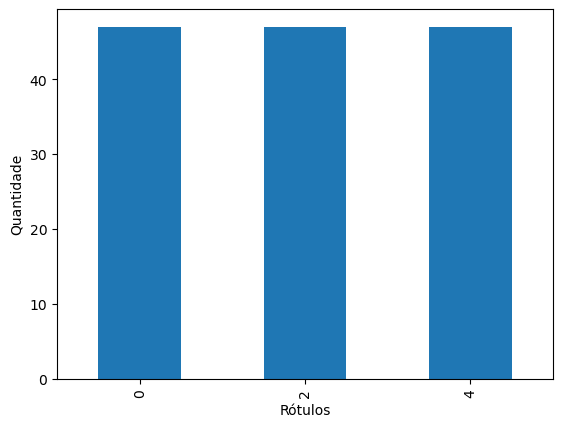

In [55]:
heuristic['score'].value_counts().sort_index().plot(kind = 'bar', xlabel='Rótulos', ylabel='Quantidade')

<AxesSubplot:xlabel='Rótulos', ylabel='Quantidade'>

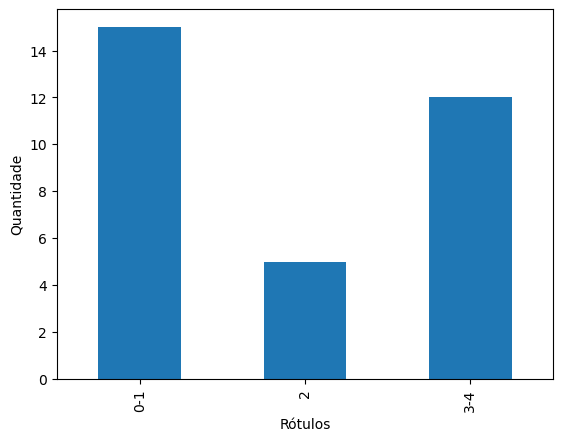

In [56]:
tmp_value_cnt = survey_agreement['SIMILARITY_SCORE'].value_counts()
dict = {'0-1': tmp_value_cnt[0]+tmp_value_cnt[1],
        '2': tmp_value_cnt[2],
        '3-4': tmp_value_cnt[3]+tmp_value_cnt[4]}
pd.Series(dict).plot(kind = 'bar', xlabel='Rótulos', ylabel='Quantidade')

<AxesSubplot:ylabel='SIMILARITY_SCORE'>

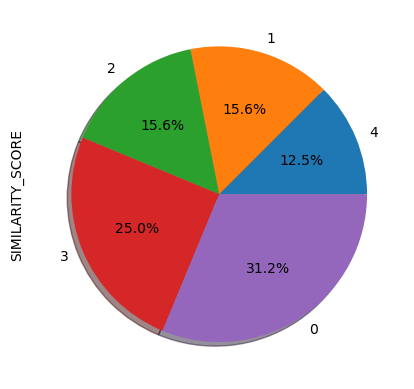

In [57]:
survey_agreement['SIMILARITY_SCORE'].value_counts().sort_values().plot.pie(legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

### 4. Qual a distribuição dos rótulos no conjunto de dados anotado heuristicamente?

<AxesSubplot:xlabel='Rótulos', ylabel='Quantidade'>

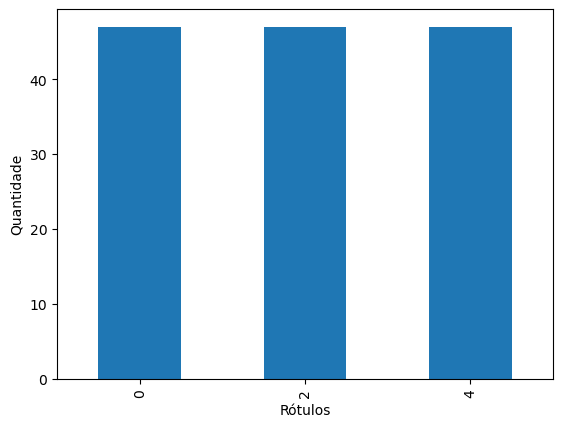

In [58]:
heuristic['score'].value_counts().sort_index().plot(kind = 'bar', xlabel='Rótulos', ylabel='Quantidade')

<AxesSubplot:ylabel='score'>

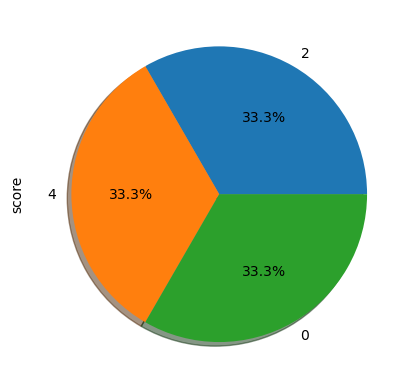

In [59]:
heuristic['score'].value_counts().sort_values().plot.pie( legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

### 5. Quão relacionados estão os rótulos dos especialistas e da heurística?
Considerando apenas os rótulos em concordância:

In [60]:
merge = pd.merge(heuristic, survey_agreement[['TEXT1','TEXT2','SIMILARITY_SCORE']],  how='left', left_on=['sentence_A','sentence_B'], right_on = ['TEXT1','TEXT2']).dropna()
merge

,sentence_A,sentence_B,score,TEXT1,TEXT2,SIMILARITY_SCORE
34,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,1.0
35,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4.0
36,AGRAVO REGIMENTAL NOS EMBARGOS DE DECLARAÇÃO N...,RECURSO ESPECIAL. CIVIL. INCORPORAÇÃO IMOBILIÁ...,2,AGRAVO REGIMENTAL NOS EMBARGOS DE DECLARAÇÃO N...,RECURSO ESPECIAL. CIVIL. INCORPORAÇÃO IMOBILIÁ...,3.0
37,DIREITO CIVIL E DO CONSUMIDOR. AGRAVO NO RECUR...,PENAL. HABEAS CORPUS SUBSTITUTIVO DE R...,0,DIREITO CIVIL E DO CONSUMIDOR. AGRAVO NO RECUR...,PENAL. HABEAS CORPUS SUBSTITUTIVO DE R...,0.0
39,CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,4,CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,2.0
40,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,0,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,1.0
41,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,0,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,2.0
42,RECURSO ESPECIAL - PROPRIEDADE INDUSTRIAL - DI...,PENAL. PROCESSUAL PENAL. HABEAS CORPUS SUBSTIT...,0,RECURSO ESPECIAL - PROPRIEDADE INDUSTRIAL - DI...,PENAL. PROCESSUAL PENAL. HABEAS CORPUS SUBSTIT...,0.0
43,RECURSO EM HABEAS CORPUS. TRÁFICO DE DROGAS E ...,HABEAS CORPUS. ARTS. 33 E 35 DA LEI Nº 11.343/...,4,RECURSO EM HABEAS CORPUS. TRÁFICO DE DROGAS E ...,HABEAS CORPUS. ARTS. 33 E 35 DA LEI Nº 11.343/...,2.0
45,AGRAVO REGIMENTAL EM AGRAVO DE INSTRUMENTO. CI...,AGRAVO REGIMENTAL NO AGRAVO (ART. 544 DO CPC) ...,2,AGRAVO REGIMENTAL EM AGRAVO DE INSTRUMENTO. CI...,AGRAVO REGIMENTAL NO AGRAVO (ART. 544 DO CPC) ...,3.0


In [61]:
len(merge)

32

In [62]:
merge[['score','SIMILARITY_SCORE']].corr(method='pearson')

,score,SIMILARITY_SCORE
score,1.000000,0.447531
SIMILARITY_SCORE,0.447531,1.000000


In [63]:
merge[['score','SIMILARITY_SCORE']].corr(method='spearman')

,score,SIMILARITY_SCORE
score,1.000000,0.431469
SIMILARITY_SCORE,0.431469,1.000000


In [64]:
scores = [merge['score'].values.tolist(), merge['SIMILARITY_SCORE'].values.tolist()]
# print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=tmp, level_of_measurement="nominal"))
print("Krippendorff's alpha for interval metric: ", krippendorff.alpha(reliability_data=scores))
# http://www.abed.org.br/congresso2011/cd/117.pdf


Krippendorff's alpha for interval metric:  0.40159329996935955


### 6. Qual a média e desvio padrão da confiança dos especialistas aos rótulos atribuídos?

In [65]:
mean = np.mean(survey['SIMILARITY_CONFIDENCE'])
mean_variance = np.var(survey['SIMILARITY_CONFIDENCE'])
mean_std = np.std(survey['SIMILARITY_CONFIDENCE'])
print('Média da confiança: ', mean, 
      '\nVariância da confiança: ', mean_variance, 
      '\nDesvio padrão da confiança: ', mean_std)

Média da confiança:  3.279166666666667 
Variância da confiança:  0.9262326388888916 
Desvio padrão da confiança:  0.9624098081840665
